# Решающие деревья

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Наша задача - научиться предсказывать значение переменной Y на основе значений X_1 и X_2.

Сначала создадим дерево решений.

In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Сделаем небольшую предобработку данных:
Выделим независимые переменные в одну структуру данных, а зависимую переменную - в другую.  

In [4]:
X = data[['X_1', 'X_2']]
y = data.Y

Теперь обучим наше дерево.

In [5]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Теперь попробуем воспользоваться полученным деревом.

Визуализируем дерево.

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

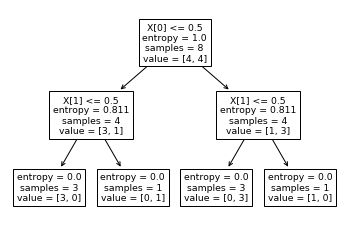

In [6]:
tree.plot_tree(clf)

## Изучение датасета Titanic

In [7]:
from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML
from graphviz import Source

In [8]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

### Данные

In [9]:
titanic_data = pd.read_csv('data/titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Наша задача - обучить модель предсказывать выжил пассажир или нет, основываясь на тех данных, которые содержатся в датасете.

Проверим наличие пропущенных значений

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Создадим переменную с параметрами, на основе котрых мы будем предсказывать модель

In [11]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Создадим переменную значений, которые мы будем учиться предсказывать

In [12]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Построим дерево решений

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
# clf.fit(X, y)

Ошибка - можно оборабатывать только числовые переменные.

Избавимся от переменных-строк.

In [14]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Построим дерево решений

In [15]:
# clf.fit(X, y)

Ошибка - невозможно обоработать пропущенные значения.

Заполним пропущенные значения медианным значением

In [16]:
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

Построим дерево решений

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"

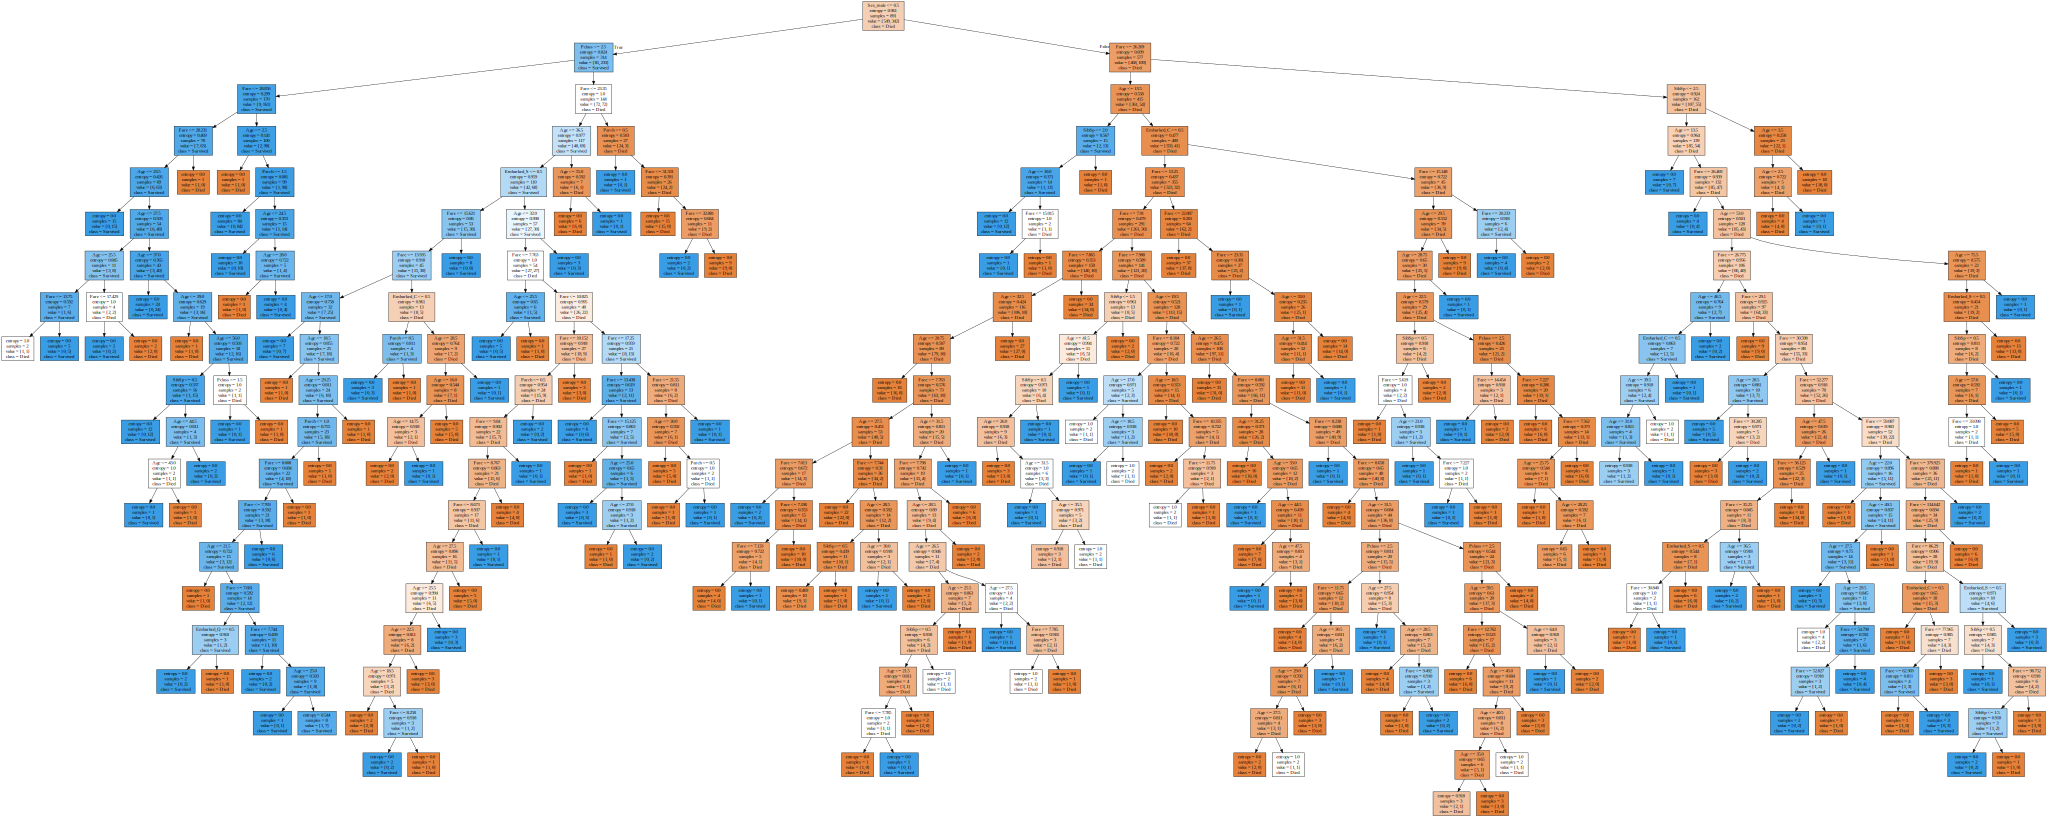

In [19]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

Жуть!!!

Есть две идеи, как поправить положение:
1. Ограничить глубину дерева.
2. Показывать дереву два набора данных: для обучения и для тестирования.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


Проверим, как работает наше дерево.

Предскажем число правильных ответов:
на исходных данных

In [22]:
clf.score(X, y)

0.9797979797979798

Обучим дерево на тренировочных данных

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Проверим точность на тренировочных данных

In [24]:
clf.score(X_train, y_train)

0.9798657718120806

Проверим точность на тестовых данных

In [25]:
clf.score(X_test, y_test)

0.7661016949152543

Печальный результат, который говорит о переобучении модели. Т.е. мы научили дерево классифицировать данные именно из этого набора данных. 
И, возможно, причина в том, что мы не ограничили количество ресурсов, которые дерево может на это потратить.

Ограничим глубину дерева и обучим модель на тренировочных данных

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Посчитаем эффективность на тренировочных данных

In [27]:
clf.score(X_train, y_train)

0.8406040268456376

Посчитаем эффективность на тестовых данных

In [28]:
clf.score(X_test, y_test)

0.8067796610169492

Эффективность модели для тестовых данных возросла.

Ограничим глубину дерева до 3.

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Посчитаем эффективность на тренировочных данных

In [30]:
clf.score(X_train, y_train)

0.8238255033557047

Посчитаем эффективность на тестовых данных

In [31]:
clf.score(X_test, y_test)

0.8203389830508474

Эффективность модели сравнялась.

# Обучение, переобучение и кроссвалидация

Заведем массив глубины дерева. 

In [32]:
max_depth_value = range(1, 100)
score_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    score_data = score_data.append(temp_score_data)
score_data.head()
    

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


Разнесем данные по результатам проверки по типам

In [33]:
score_data_long = pd.melt(score_data, 
                          id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


Нарисуем разницу на тренировочный и тестовых данных

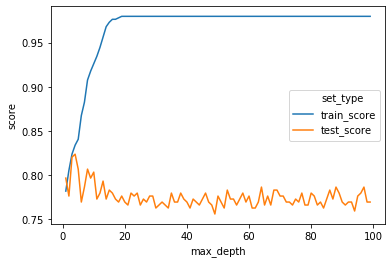

In [34]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=score_data_long)

## Кроссвалидация

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

Таким образом подправим наш расчет, сохраняя еще и среднее кроссвалидации

In [37]:
max_depth_value = range(1, 100)
score_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073


In [38]:
score_data_long = pd.melt(score_data, 
                          id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


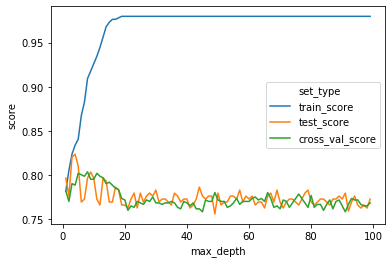

In [39]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=score_data_long)

Посмотрим на числовой результат

In [40]:
score_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.795308


Создадим лучшее дерево по результатам и проверим его на тестовых данных

In [41]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763